In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error

In [6]:
data = pd.read_parquet("~/homework/data/yellow_tripdata_2022-01.parquet")

1) How many columns

In [9]:
data.shape


(2463931, 19)

2) Standard deviaiton of the duration

In [13]:
data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).apply(lambda row: row.total_seconds()/60)

data['duration'].std()

46.44530513776499

3. Dropping outliers

In [16]:
data[(data.duration >= 1) & (data.duration <= 60) ].shape

(2421440, 20)

In [17]:
clean_data = data[(data.duration >= 1) & (data.duration <= 60) ]

4. Lets OHE our to columns of interest in the model 

In [18]:
clean_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [39]:
categorical = ['PULocationID','DOLocationID']

dv = DictVectorizer()

train_dct = clean_data[categorical].astype(str).to_dict(orient = 'records')
x_train = dv.fit_transform(train_dct)

target = 'duration'
y_train = clean_data[target].values

In [29]:
x_train

<2421440x515 sparse matrix of type '<class 'numpy.float64'>'
	with 4842880 stored elements in Compressed Sparse Row format>

5. Lets fit the basic model

the mse of the training data is 6.986190933347471


/tmp/ipykernel_1755/1281917492.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Prediction')
/tmp/ipykernel_1755/1281917492.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'Actual')


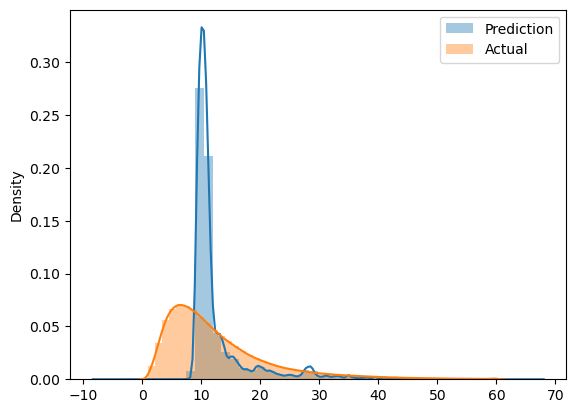

In [32]:
lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_train)
mse = mean_squared_error(y_train,y_pred,squared = False)
print("the mse of the training data is", mse)
sns.distplot(y_pred, label = 'Prediction')
sns.distplot(y_train, label = 'Actual')
plt.legend()

6. Fit and transfor the test data in the same way

In [40]:
def preprocess(file):
    
    data = pd.read_parquet(file) 
    data['duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).apply(lambda row: row.total_seconds()/60)
    
    data = data[(data.duration >= 1) & (data.duration <= 60) ]
    
    return(data)


test = preprocess("~/homework/data/yellow_tripdata_2022-01.parquet")

test_dct = test[categorical].astype(str).to_dict(orient = 'records')
x_test= dv.transform(test_dct)

y_test = test[target].values

In [38]:
x_test

DictVectorizer()

In [ ]:
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred,squared = False)
print("the mse of the training data is", mse)
sns.distplot(y_pred, label = 'Prediction')
sns.distplot(y_train, label = 'Actual')
plt.legend()

the mse of the training data is 6.986190933347471


/tmp/ipykernel_1755/2534052596.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'Prediction')
/tmp/ipykernel_1755/2534052596.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'Actual')
